# <center> ${\text{Data 606 Capstone Project: Manufacturing}}$

## Exploratory Data Analysis

### 1.0 Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import skewnorm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import lifelines
from lifelines import KaplanMeierFitter as km
import seaborn as sns
sns.set()
import warnings

warnings.filterwarnings('ignore')

### 1.1 Preprocessing

- First we explore each file individual to check. We look at the column datatypes, missing information and description.
- We rename the columns of the TTF file to remove the gaps.
- Ww carry out exploratory analysis.

In [ ]:
train02 = pd.read_csv('01_M02_DC_train.csv')
ttf = pd.read_csv('01_M02_DC_train_ttf.csv')
fault = pd.read_csv('01_M02_train_fault_data.csv')

#### Rename the `ttf` column names

In [ ]:
ttf = ttf.rename({'TTF_FlowCool Pressure Dropped Below Limit':'Flowcool_Pressure_dropped_below_limit'}, axis='columns')
ttf = ttf.rename({'TTF_Flowcool Pressure Too High Check Flowcool Pump':'Flowcool_Pressure_Too_High'}, axis='columns')
ttf = ttf.rename({'TTF_Flowcool leak':'TTF_Flowcool_leak'}, axis='columns')

####  Train data

In [ ]:
train02.head()

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION
0,3283834,01M02,1,9253,10511673,67,1,-0.079428,-0.958814,-0.959509,...,-1.751661,-2.783162,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
1,3283838,01M02,1,9253,10511673,67,1,-0.079419,-0.958928,-0.959651,...,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
2,3283842,01M02,1,9253,10511673,67,1,-0.079409,-0.959156,-0.960006,...,-1.743905,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
3,3283846,01M02,1,9253,10511673,67,1,-0.079420,-0.958928,-0.959297,...,-1.747158,-2.780884,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785
4,3283850,01M02,1,9253,10511673,67,1,-0.079430,-0.959269,-0.959438,...,-1.747158,-2.784389,2.027848,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785


In [ ]:
train02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110542 entries, 0 to 5110541
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   time                     int64  
 1   Tool                     object 
 2   stage                    int64  
 3   Lot                      int64  
 4   runnum                   int64  
 5   recipe                   int64  
 6   recipe_step              int64  
 7   IONGAUGEPRESSURE         float64
 8   ETCHBEAMVOLTAGE          float64
 9   ETCHBEAMCURRENT          float64
 10  ETCHSUPPRESSORVOLTAGE    float64
 11  ETCHSUPPRESSORCURRENT    float64
 12  FLOWCOOLFLOWRATE         float64
 13  FLOWCOOLPRESSURE         float64
 14  ETCHGASCHANNEL1READBACK  float64
 15  ETCHPBNGASREADBACK       float64
 16  FIXTURETILTANGLE         float64
 17  ROTATIONSPEED            float64
 18  ACTUALROTATIONANGLE      float64
 19  FIXTURESHUTTERPOSITION   float64
 20  ETCHSOURCEUSAGE          float64
 21  ETCHAUXS

In [ ]:
train02.isnull().sum()

time                       0
Tool                       0
stage                      0
Lot                        0
runnum                     0
recipe                     0
recipe_step                0
IONGAUGEPRESSURE           0
ETCHBEAMVOLTAGE            0
ETCHBEAMCURRENT            0
ETCHSUPPRESSORVOLTAGE      0
ETCHSUPPRESSORCURRENT      0
FLOWCOOLFLOWRATE           0
FLOWCOOLPRESSURE           0
ETCHGASCHANNEL1READBACK    0
ETCHPBNGASREADBACK         0
FIXTURETILTANGLE           0
ROTATIONSPEED              0
ACTUALROTATIONANGLE        0
FIXTURESHUTTERPOSITION     7
ETCHSOURCEUSAGE            0
ETCHAUXSOURCETIMER         0
ETCHAUX2SOURCETIMER        0
ACTUALSTEPDURATION         0
dtype: int64

####   Time to Fault (TTF) data

In [ ]:
ttf.head()

,time,TTF_FlowCool Pressure Dropped Below Limit,TTF_Flowcool Pressure Too High Check Flowcool Pump,TTF_Flowcool leak
0,3283834,623234.0,9146470.0,632514.0
1,3283838,623230.0,9146466.0,632510.0
2,3283842,623226.0,9146462.0,632506.0
3,3283846,623222.0,9146458.0,632502.0
4,3283850,623218.0,9146454.0,632498.0


In [ ]:
ttf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110542 entries, 0 to 5110541
Data columns (total 4 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   time                                                int64  
 1   TTF_FlowCool Pressure Dropped Below Limit           float64
 2   TTF_Flowcool Pressure Too High Check Flowcool Pump  float64
 3   TTF_Flowcool leak                                   float64
dtypes: float64(3), int64(1)
memory usage: 156.0 MB


In [ ]:
ttf.isnull().sum()

time                                                        0
TTF_FlowCool Pressure Dropped Below Limit              486017
TTF_Flowcool Pressure Too High Check Flowcool Pump    1348832
TTF_Flowcool leak                                      490246
dtype: int64

#### Fault Data

In [ ]:
fault.head()

,time,fault_name,Tool
0,3907068,FlowCool Pressure Dropped Below Limit,01M02
1,3915070,FlowCool Pressure Dropped Below Limit,01M02
2,3916348,Flowcool leak,01M02
3,3916822,Flowcool leak,01M02
4,3918310,FlowCool Pressure Dropped Below Limit,01M02


In [ ]:
fault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   time        109 non-null    int64 
 1   fault_name  109 non-null    object
 2   Tool        109 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.7+ KB


### EDA Train Data

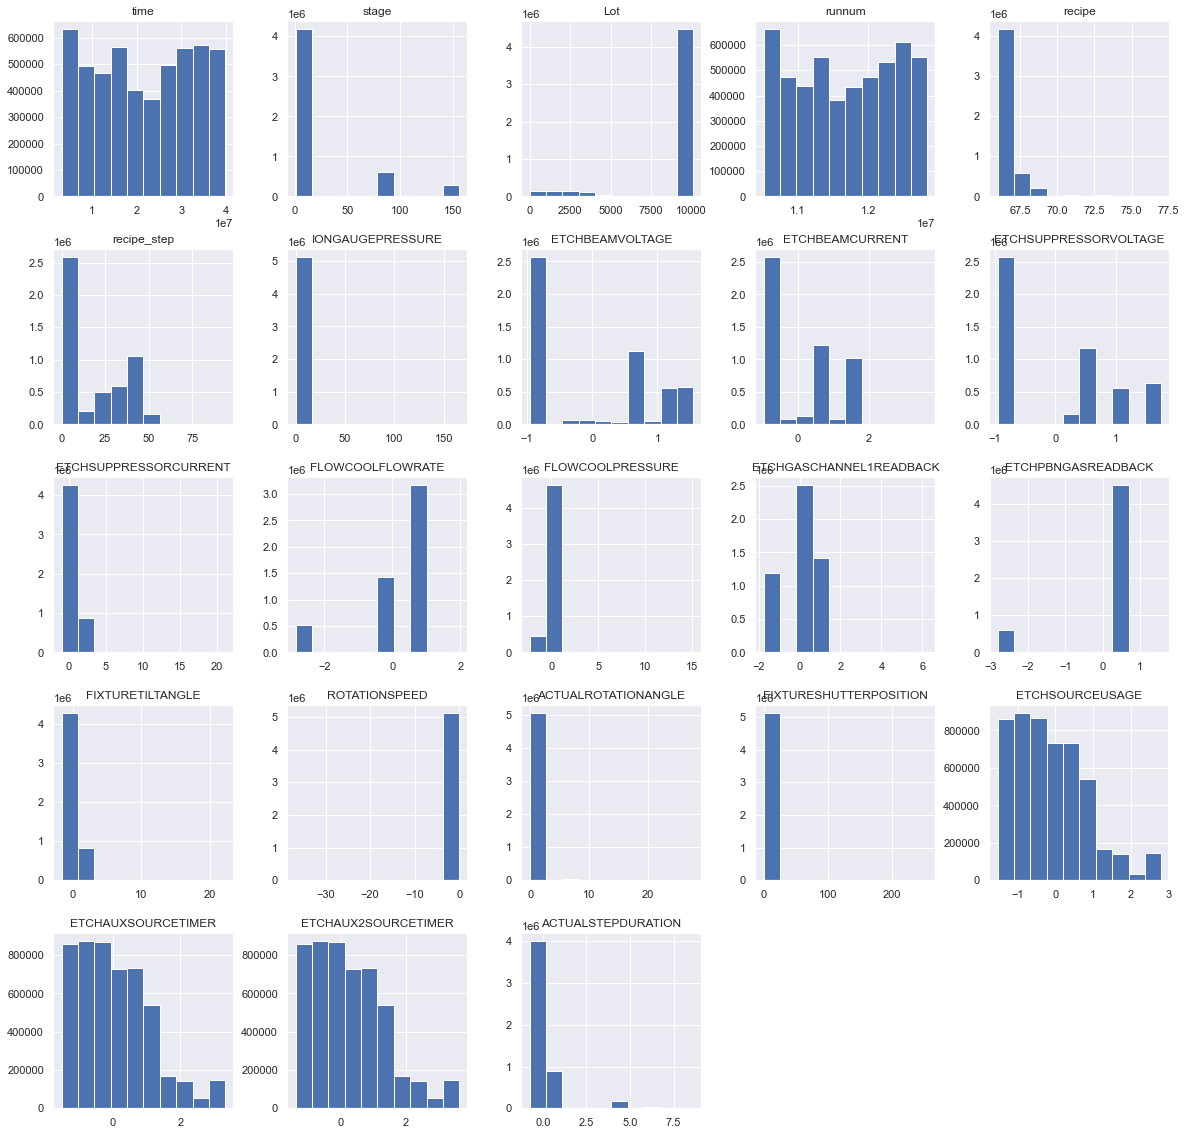

In [ ]:
train02.hist(figsize=(20,20))

plt.show()

#### Correlation

The correlation shows us that somes of the columns are highly correlated. 

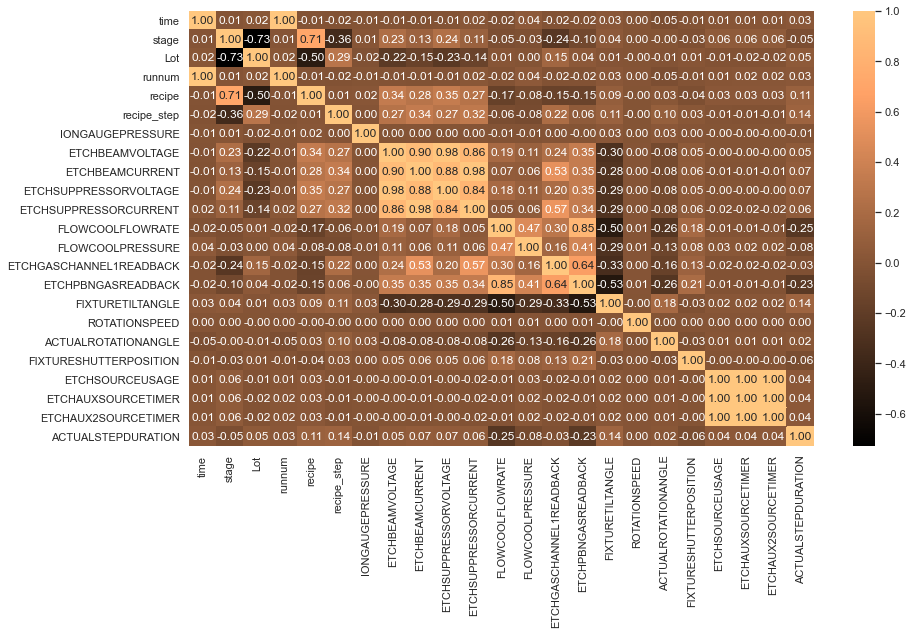

In [ ]:
plt.figure(figsize=(14,8))
sns.heatmap(train02.corr(), annot=True, cmap ='copper', fmt='.2f')
plt.show()

In [ ]:
train02.describe().T

,count,mean,std,min,25%,50%,75%,max
time,5110542.0,2.156786e+07,1.096851e+07,3.283834e+06,1.181060e+07,2.142051e+07,3.178949e+07,3.978984e+07
stage,5110542.0,2.002992e+01,4.180127e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.560000e+02
Lot,5110542.0,8.520604e+03,2.452327e+03,0.000000e+00,9.188000e+03,9.332000e+03,9.613000e+03,1.010600e+04
runnum,5110542.0,1.168304e+07,7.026318e+05,1.051167e+07,1.105408e+07,1.169892e+07,1.233673e+07,1.283818e+07
recipe,5110542.0,6.706639e+01,1.201514e+00,6.600000e+01,6.600000e+01,6.700000e+01,6.700000e+01,7.700000e+01
recipe_step,5110542.0,1.855574e+01,1.687512e+01,0.000000e+00,3.000000e+00,9.000000e+00,3.500000e+01,9.400000e+01
IONGAUGEPRESSURE,5110542.0,5.469851e-03,1.286271e+00,-7.961339e-02,-1.450073e-02,6.148492e-03,1.743870e-02,1.656602e+02
ETCHBEAMVOLTAGE,5110542.0,-3.688936e-03,1.000001e+00,-9.601358e-01,-9.505108e-01,-9.269080e-01,7.116369e-01,1.550754e+00
ETCHBEAMCURRENT,5110542.0,-3.468917e-03,1.000273e+00,-9.674536e-01,-9.591547e-01,-9.372372e-01,7.877922e-01,3.645582e+00
ETCHSUPPRESSORVOLTAGE,5110542.0,-3.799105e-03,9.996961e-01,-9.487159e-01,-9.471112e-01,-9.049321e-01,6.380437e-01,1.749785e+00


In [ ]:
train02['Tool'].value_counts()

01M02    5110542
Name: Tool, dtype: int64

In [ ]:
train02['recipe'].value_counts()

67    2716985
66    1443477
68     593641
69     218070
71      40771
73      33830
72      20474
74      17062
76      11793
70      11731
75       1634
77       1074
Name: recipe, dtype: int64

In [ ]:
train02['recipe_step'].value_counts()

3     1707312
39     423890
43     390326
1      299146
7      286225
       ...   
87          1
79          1
81          1
83          1
77          1
Name: recipe_step, Length: 95, dtype: int64

In [ ]:
train02['Lot'].value_counts()

9605    85452
9665    66737
9613    58276
9345    44395
9208    44089
        ...  
1638       94
281        94
9502       94
1178       94
9356       86
Name: Lot, Length: 1769, dtype: int64

In [ ]:
train02['stage'].value_counts()

1      4172255
88      621057
143     216174
144      40308
44       20474
145      17358
147      13459
151       2324
150       1896
149       1369
156       1177
148        898
146        715
152        465
154        330
153        283
Name: stage, dtype: int64

In [ ]:
train02['FIXTURESHUTTERPOSITION'].value_counts()

1.0      4101355
0.0       950342
3.0        29652
2.0        29051
255.0        135
Name: FIXTURESHUTTERPOSITION, dtype: int64

In [ ]:
train02['IONGAUGEPRESSURE'].value_counts()

0.013171    73683
0.001917    68880
0.014220    65211
0.007118    65193
0.013694    64434
            ...  
1.314288        1
0.348477        1
5.932082        1
5.202958        1
0.120809        1
Name: IONGAUGEPRESSURE, Length: 1855, dtype: int64

In [ ]:
train02['ROTATIONSPEED'].value_counts()

-1.320719e-02    5110500
-3.672767e+01         40
-6.521799e-15          2
Name: ROTATIONSPEED, dtype: int64

In [ ]:
train02['ACTUALROTATIONANGLE'].value_counts()

-1.224460e-01    1581706
-1.224550e-01    1430299
-1.224371e-01    1135561
-1.224639e-01     450681
-1.224281e-01     188559
                  ...   
 2.307788e+00         19
 4.528761e+00         19
 7.425045e+00         16
 1.164213e+00         16
-2.482405e-17          3
Name: ACTUALROTATIONANGLE, Length: 141, dtype: int64

In [ ]:
train02.time.min()

3283834

Text(0, 0.5, 'Etch source usage')

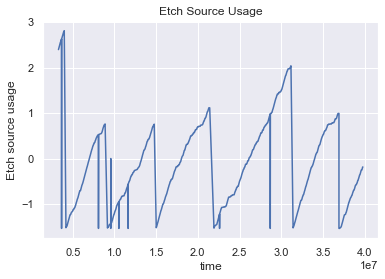

In [ ]:
plt.plot( train02['time'], train02['ETCHSOURCEUSAGE']);
plt.title('Etch Source Usage')
plt.xlabel('time')
plt.ylabel('Etch source usage')
#plt.set_xlim(xmin=3283834)

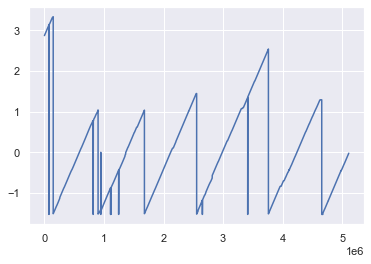

In [ ]:
#fig, ax = plt.plot()

plt.plot(train02['ETCHAUXSOURCETIMER'])
#plt.xscale('log')
#plt.xlim(10)
plt.show()

### EDA Fault Data

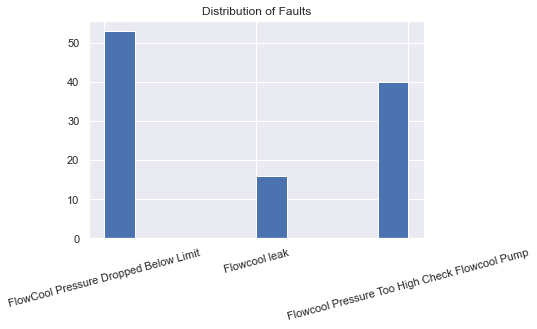

In [ ]:
fault['fault_name'].hist()
plt.title('Distribution of Faults')
plt.xticks(rotation=15);
plt.savefig("Distribution of Faults.png")

In [ ]:
fault['fault_name'].value_counts()

FlowCool Pressure Dropped Below Limit             53
Flowcool Pressure Too High Check Flowcool Pump    40
Flowcool leak                                     16
Name: fault_name, dtype: int64

In [ ]:
fault['Tool'].value_counts()

01M02    109
Name: Tool, dtype: int64

### EDA TTF Data

In [ ]:
ttf.describe()

,time,Flowcool_Pressure_dropped_below_limit,Flowcool_Pressure_Too_High,TTF_Flowcool_leak
count,5.110542e+06,4.624525e+06,3.761710e+06,4.620296e+06
mean,2.156786e+07,2.471416e+06,4.432889e+06,3.645101e+06
std,1.096851e+07,2.277070e+06,2.601694e+06,2.749403e+06
min,3.283834e+06,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.181060e+07,6.989580e+05,2.220720e+06,1.359564e+06
50%,2.142051e+07,1.951936e+06,4.673931e+06,2.978302e+06
75%,3.178949e+07,3.439558e+06,6.474414e+06,5.920125e+06
max,3.978984e+07,9.921890e+06,9.183270e+06,1.031363e+07


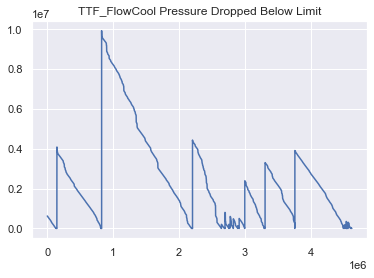

In [ ]:
ttf['Flowcool_Pressure_dropped_below_limit'].plot()
plt.title('TTF_FlowCool Pressure Dropped Below Limit')
plt.show()

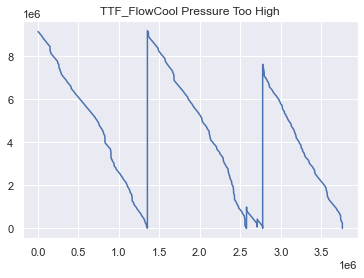

In [ ]:
ttf['Flowcool_Pressure_Too_High'].plot()
plt.title('TTF_FlowCool Pressure Too High')
plt.show()

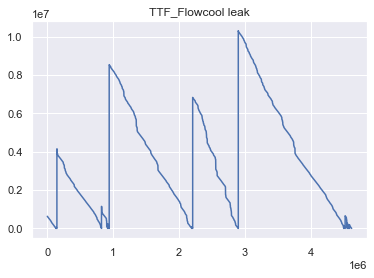

In [ ]:
ttf['TTF_Flowcool_leak'].plot()
plt.title('TTF_Flowcool leak')
plt.show()

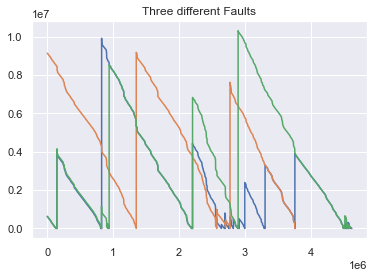

In [ ]:
ttf['Flowcool_Pressure_dropped_below_limit'].plot()
ttf['Flowcool_Pressure_Too_High'].plot()
ttf['TTF_Flowcool_leak'].plot()
plt.title('Three different Faults')
plt.show()

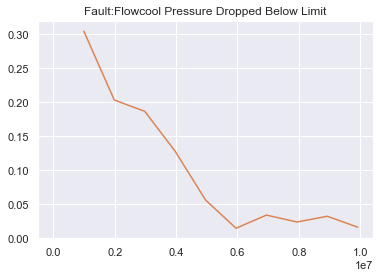

In [ ]:
counts, bin_edges, ignored = plt.hist(ttf['Flowcool_Pressure_dropped_below_limit'], density=True)
pdf =counts/(sum(counts))
plt.plot(bin_edges[1:], pdf)
plt.title('Fault:Flowcool Pressure Dropped Below Limit')
plt.show()

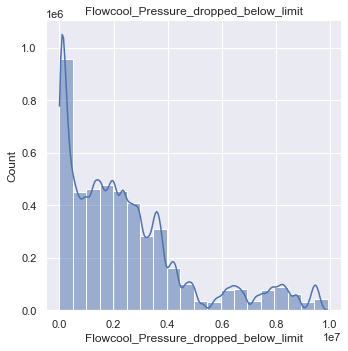

In [ ]:
sns.displot(x=ttf['Flowcool_Pressure_dropped_below_limit'], bins=20, kde=True)
plt.title('Flowcool_Pressure_dropped_below_limit')
plt.savefig('Flowcool Pressure dropped')
plt.show()

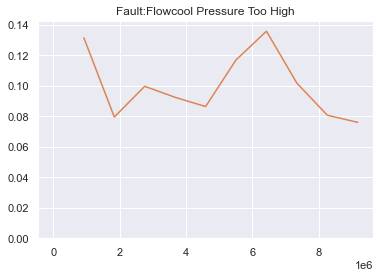

In [ ]:
counts, bin_edges, ignored = plt.hist(ttf['Flowcool_Pressure_Too_High'], density=True)
pdf =counts/(sum(counts))
plt.plot(bin_edges[1:], pdf)
plt.title('Fault:Flowcool Pressure Too High')
plt.show()

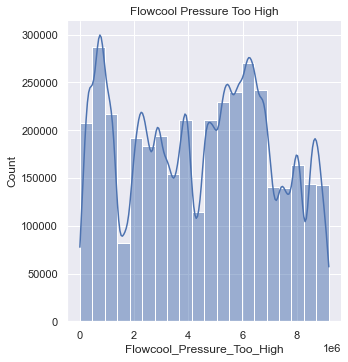

In [ ]:
sns.displot(x=ttf['Flowcool_Pressure_Too_High'], bins=20, kde=True)
plt.title('Flowcool Pressure Too High')
plt.savefig('Flowcool Pressure Too High')
plt.show()

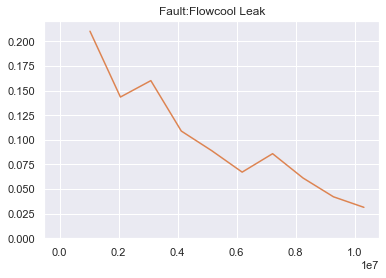

In [ ]:
counts, bin_edges, ignored = plt.hist(ttf['TTF_Flowcool_leak'], density =True)
pdf =counts/(sum(counts))
plt.plot(bin_edges[1:], pdf)
plt.title('Fault:Flowcool Leak')
plt.show()

<Figure size 576x864 with 0 Axes>

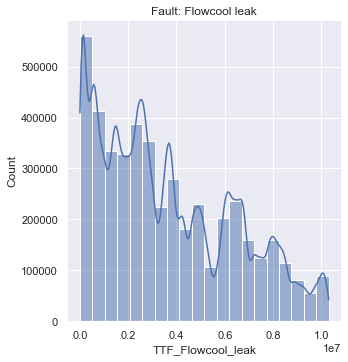

In [ ]:
plt.figure(figsize=(8,12))
sns.displot(x=ttf['TTF_Flowcool_leak'], bins=20, kde=True)
plt.title('Fault: Flowcool Leak')
plt.savefig('Flowcool_leak')
plt.show()

#### Merging TTF and Fault data

In [ ]:
data2 = pd.merge(ttf,fault, how='outer', on='time')

In [ ]:
data2.head()

,time,Flowcool_Pressure_dropped_below_limit,Flowcool_Pressure_Too_High,TTF_Flowcool_leak,fault_name,Tool
0,3283834,623234.0,9146470.0,632514.0,NaN,NaN
1,3283838,623230.0,9146466.0,632510.0,NaN,NaN
2,3283842,623226.0,9146462.0,632506.0,NaN,NaN
3,3283846,623222.0,9146458.0,632502.0,NaN,NaN
4,3283850,623218.0,9146454.0,632498.0,NaN,NaN


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110615 entries, 0 to 5110614
Data columns (total 6 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   time                                   int64  
 1   Flowcool_Pressure_dropped_below_limit  float64
 2   Flowcool_Pressure_Too_High             float64
 3   TTF_Flowcool_leak                      float64
 4   fault_name                             object 
 5   Tool                                   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 272.9+ MB


In [ ]:
data2.isnull().sum()

time                                           0
Flowcool_Pressure_dropped_below_limit     486090
Flowcool_Pressure_Too_High               1348905
TTF_Flowcool_leak                         490319
fault_name                               5110506
Tool                                     5110506
dtype: int64

In [ ]:
data2.loc[data2. Flowcool_Pressure_dropped_below_limit==0,:].head()

,time,Flowcool_Pressure_dropped_below_limit,Flowcool_Pressure_Too_High,TTF_Flowcool_leak,fault_name,Tool
131033,3907068,0.0,8523236.0,9280.0,FlowCool Pressure Dropped Below Limit,01M02
144072,3962388,0.0,8467916.0,8512.0,FlowCool Pressure Dropped Below Limit,01M02
146084,3971424,0.0,8458880.0,4153010.0,FlowCool Pressure Dropped Below Limit,01M02
146565,3973348,0.0,8456956.0,4151086.0,FlowCool Pressure Dropped Below Limit,01M02
816430,8072052,0.0,4358252.0,52382.0,FlowCool Pressure Dropped Below Limit,01M02


In [ ]:
data2.loc[data2.TTF_Flowcool_leak==0,:].head(16)

,time,Flowcool_Pressure_dropped_below_limit,Flowcool_Pressure_Too_High,TTF_Flowcool_leak,fault_name,Tool
133014,3916348,1962.0,8513956.0,0.0,Flowcool leak,01M02
145953,3970900,524.0,8459404.0,0.0,Flowcool leak,01M02
822683,8124434,552.0,4305870.0,0.0,Flowcool leak,01M02
916683,9273100,8784800.0,3157204.0,0.0,Flowcool leak,01M02
2193412,18061382,13266.0,3843958.0,0.0,Flowcool leak,01M02
2899284,25025806,111170.0,6399752.0,0.0,Flowcool leak,01M02
4500764,35339442,140390.0,NaN,0.0,Flowcool leak,01M02
4521333,35479998,187760.0,NaN,0.0,Flowcool leak,01M02
4571574,36408260,303904.0,NaN,0.0,Flowcool leak,01M02
4586736,36575444,136720.0,NaN,0.0,Flowcool leak,01M02


In [ ]:
data2.loc[data2.TTF_Flowcool_leak==2,:].head(16)

,time,Flowcool_Pressure_dropped_below_limit,Flowcool_Pressure_Too_High,TTF_Flowcool_leak,fault_name,Tool
133132,3916820,1490.0,8513484.0,2.0,NaN,NaN
4554636,36138196,2020.0,NaN,2.0,NaN,NaN
4620295,36767404,10048.0,NaN,2.0,NaN,NaN


In [ ]:
data2.loc[data2.Flowcool_Pressure_Too_High==2,:].head()

,time,Flowcool_Pressure_dropped_below_limit,Flowcool_Pressure_Too_High,TTF_Flowcool_leak,fault_name,Tool
2576052,22073940,501212.0,2.0,2951866.0,NaN,NaN
2776228,23801806,33136.0,2.0,1224000.0,NaN,NaN


In [ ]:
data2.loc[data2.Flowcool_Pressure_Too_High==2,:].head()

In [ ]:
data2.loc[data2.TTF_Flowcool_Pressure_Too_High==0,:].head()

,time,TTF_flowcool_pressure_dropped_below_limit,TTF_Flowcool_Pressure_Too_High,TTF_Flowcool_leak,fault_name,Tool
2576444,22075508,499644.0,0.0,2950298.0,Flowcool Pressure Too High Check Flowcool Pump,01M02
3761261,31425558,2274.0,0.0,3913884.0,Flowcool Pressure Too High Check Flowcool Pump,01M02
3761709,31427350,482.0,0.0,3912092.0,Flowcool Pressure Too High Check Flowcool Pump,01M02


<AxesSubplot:xlabel='time'>

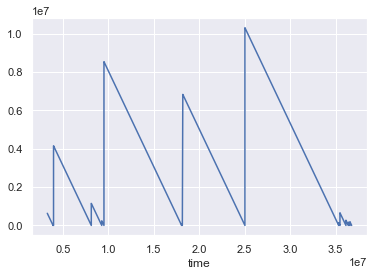

In [ ]:
data2['TTF_Flowcool_leak'].plot()

### Fault 1 - Frequency Histograms

In [ ]:
event = []

for row in df1['Flowcool_Pressure_dropped_below_limit']:
    if row == 0:
        event.append(1)
    else:
        event.append(0)

df1['event'] = event

In [ ]:
f1a = df1.drop('time', axis =1)

In [ ]:
f1a['event'].value_counts()

0    4624502
1         23
Name: event, dtype: int64

In [ ]:
df_fault1 =  f1a['Flowcool_Pressure_dropped_below_limit']

In [ ]:
df_fault1.head()

0    623234.0
1    623230.0
2    623226.0
3    623222.0
4    623218.0
Name: Flowcool_Pressure_dropped_below_limit, dtype: float64

In [ ]:
df_cen = f1a[f1a['event']==0]

<AxesSubplot:>

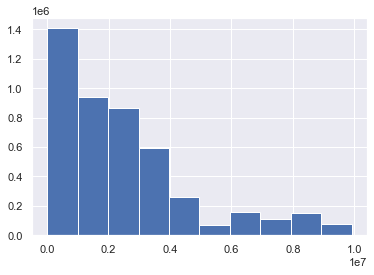

In [ ]:
df_cen.Flowcool_Pressure_dropped_below_limit.hist()

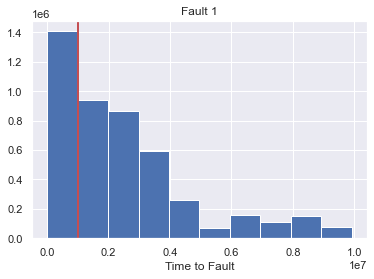

In [ ]:
fig, ax = plt.subplots()

ax.hist(df_fault1)
ax.axvline(x=1000000, linewidth = 2, color ='r')
plt.title('Fault 1')
plt.xlabel('Time to Fault')

plt.show()

In [ ]:
num =1000000

In [ ]:
df_f1M = f1a.loc[f1a['Flowcool_Pressure_dropped_below_limit']<num]
df_f1M = df_f1M.drop('event',axis =1)

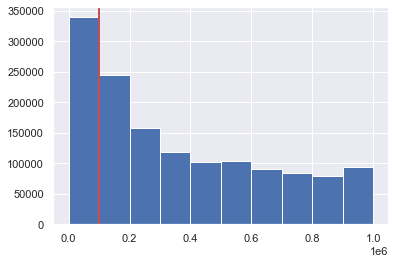

In [ ]:
fig, ax = plt.subplots()

ax.hist(df_f1M)
ax.axvline(x=100000, linewidth =2, color='r')

In [ ]:
num2 = 100000

In [ ]:
df_f2M = f1a.loc[f1a['Flowcool_Pressure_dropped_below_limit']<num2]
df_f2M = df_f2M.drop('event',axis =1)

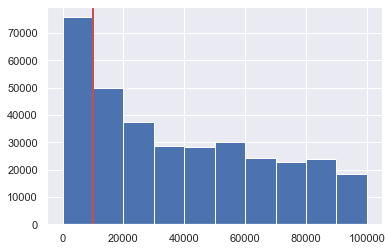

In [ ]:
fig, ax = plt.subplots()

ax.hist(df_f2M)
ax.axvline(x=10000, linewidth = 2, color ='r')

plt.show()

In [ ]:
df_f2M.shape

(472092, 1)

## 2.0 Feature Engineering 

### 2.0 Merging Train and TTF data

In [ ]:
alldata1 = pd.merge(train02,ttf, how='outer', on='time')

In [ ]:
alldata1.head()

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,Flowcool_Pressure_dropped_below_limit,Flowcool_Pressure_Too_High,TTF_Flowcool_leak
0,3283834,01M02,1,9253,10511673,67,1,-0.079428,-0.958814,-0.959509,...,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,623234.0,9146470.0,632514.0
1,3283838,01M02,1,9253,10511673,67,1,-0.079419,-0.958928,-0.959651,...,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,623230.0,9146466.0,632510.0
2,3283842,01M02,1,9253,10511673,67,1,-0.079409,-0.959156,-0.960006,...,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,623226.0,9146462.0,632506.0
3,3283846,01M02,1,9253,10511673,67,1,-0.079420,-0.958928,-0.959297,...,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,623222.0,9146458.0,632502.0
4,3283850,01M02,1,9253,10511673,67,1,-0.079430,-0.959269,-0.959438,...,-0.013207,-0.122437,0.0,2.39537,2.871511,3.175941,4.037785,623218.0,9146454.0,632498.0


In [ ]:
alldata1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5125986 entries, 0 to 5125985
Data columns (total 27 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   time                                   int64  
 1   Tool                                   object 
 2   stage                                  int64  
 3   Lot                                    int64  
 4   runnum                                 int64  
 5   recipe                                 int64  
 6   recipe_step                            int64  
 7   IONGAUGEPRESSURE                       float64
 8   ETCHBEAMVOLTAGE                        float64
 9   ETCHBEAMCURRENT                        float64
 10  ETCHSUPPRESSORVOLTAGE                  float64
 11  ETCHSUPPRESSORCURRENT                  float64
 12  FLOWCOOLFLOWRATE                       float64
 13  FLOWCOOLPRESSURE                       float64
 14  ETCHGASCHANNEL1READBACK                float64
 15

In [ ]:
alldata1.isnull().sum()

time                                           0
Tool                                           0
stage                                          0
Lot                                            0
runnum                                         0
recipe                                         0
recipe_step                                    0
IONGAUGEPRESSURE                               0
ETCHBEAMVOLTAGE                                0
ETCHBEAMCURRENT                                0
ETCHSUPPRESSORVOLTAGE                          0
ETCHSUPPRESSORCURRENT                          0
FLOWCOOLFLOWRATE                               0
FLOWCOOLPRESSURE                               0
ETCHGASCHANNEL1READBACK                        0
ETCHPBNGASREADBACK                             0
FIXTURETILTANGLE                               0
ROTATIONSPEED                                  0
ACTUALROTATIONANGLE                            0
FIXTURESHUTTERPOSITION                         7
ETCHSOURCEUSAGE     

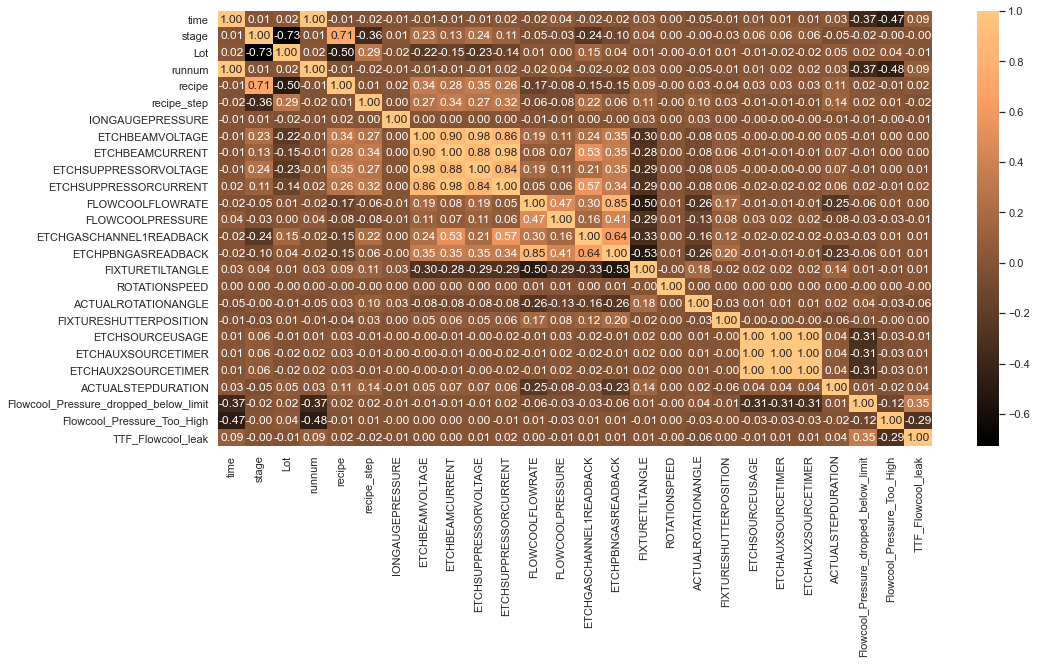

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(alldata1.corr(), annot=True, cmap ='copper', fmt='.2f')
plt.show()

In [ ]:
alldata1.loc[alldata1['FIXTURESHUTTERPOSITION']==1].head()

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,Flowcool_Pressure_dropped_below_limit,Flowcool_Pressure_Too_High,TTF_Flowcool_leak
49,3284030,01M02,1,9253,10511673,67,3,-0.000342,-0.005718,-0.061104,...,-0.013207,-0.122437,1.0,2.395414,2.871561,3.175993,4.037785,623038.0,9146274.0,632318.0
50,3284034,01M02,1,9253,10511673,67,3,-0.000342,-0.005489,-0.056493,...,-0.013207,-0.122437,1.0,2.395417,2.871564,3.175997,4.037785,623034.0,9146270.0,632314.0
51,3284038,01M02,1,9253,10511673,67,3,-0.000342,-0.005775,-0.060323,...,-0.013207,-0.122437,1.0,2.395420,2.871568,3.176000,4.037785,623030.0,9146266.0,632310.0
52,3284042,01M02,1,9253,10511673,67,3,-0.000342,-0.005775,-0.061814,...,-0.013207,-0.122437,1.0,2.395422,2.871572,3.176004,4.037785,623026.0,9146262.0,632306.0
53,3284046,01M02,1,9253,10511673,67,3,-0.000342,-0.005375,-0.055429,...,-0.013207,-0.122437,1.0,2.395427,2.871576,3.176008,4.037785,623022.0,9146258.0,632302.0


In [ ]:
fixture = alldata1.loc[alldata1['FIXTURESHUTTERPOSITION']==1]

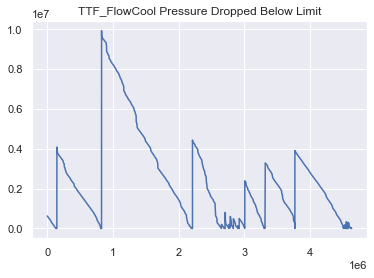

In [ ]:
fixture['Flowcool_Pressure_dropped_below_limit'].plot()
plt.title('TTF_FlowCool Pressure Dropped Below Limit')
plt.show()

In [ ]:
fixture2 = alldata1.loc[alldata1['FIXTURESHUTTERPOSITION']==2]

In [ ]:
fixture2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29123 entries, 48 to 5125956
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   time                                   29123 non-null  int64  
 1   Tool                                   29123 non-null  object 
 2   stage                                  29123 non-null  int64  
 3   Lot                                    29123 non-null  int64  
 4   runnum                                 29123 non-null  int64  
 5   recipe                                 29123 non-null  int64  
 6   recipe_step                            29123 non-null  int64  
 7   IONGAUGEPRESSURE                       29123 non-null  float64
 8   ETCHBEAMVOLTAGE                        29123 non-null  float64
 9   ETCHBEAMCURRENT                        29123 non-null  float64
 10  ETCHSUPPRESSORVOLTAGE                  29123 non-null  float64
 11 

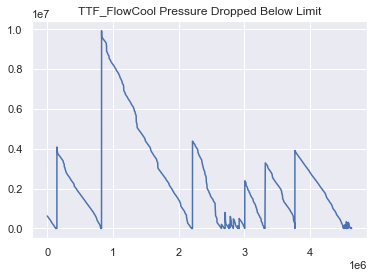

In [ ]:
fixture2['Flowcool_Pressure_dropped_below_limit'].plot()
plt.title('TTF_FlowCool Pressure Dropped Below Limit')
plt.show()

### 2.1 Faults
Create event columns that categorize close to failure or failure and not failure for the different type of faults. 

In [ ]:
event1 = []

for row in alldata1['Flowcool_Pressure_dropped_below_limit']:
    if row < 600:
        event1.append(1)
    else:
        event1.append(0)

alldata1['event1'] = event1

In [ ]:
event2 = []

for row in alldata1['Flowcool_Pressure_Too_High']:
    if row < 600:
        event2.append(1)
    else:
        event2.append(0)

alldata1['event2'] = event2

In [ ]:
event3 = []

for row in alldata1['TTF_Flowcool_leak']:
    if row < 600:
        event3.append(1)
    else:
        event3.append(0)

alldata1['event3'] = event3

In [ ]:
alldata1.head()

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,Flowcool_Pressure_dropped_below_limit,Flowcool_Pressure_Too_High,TTF_Flowcool_leak,event1,event2,event3
0,3283834,01M02,1,9253,10511673,67,1,-0.079428,-0.958814,-0.959509,...,2.39537,2.871511,3.175941,4.037785,623234.0,9146470.0,632514.0,0,0,0
1,3283838,01M02,1,9253,10511673,67,1,-0.079419,-0.958928,-0.959651,...,2.39537,2.871511,3.175941,4.037785,623230.0,9146466.0,632510.0,0,0,0
2,3283842,01M02,1,9253,10511673,67,1,-0.079409,-0.959156,-0.960006,...,2.39537,2.871511,3.175941,4.037785,623226.0,9146462.0,632506.0,0,0,0
3,3283846,01M02,1,9253,10511673,67,1,-0.079420,-0.958928,-0.959297,...,2.39537,2.871511,3.175941,4.037785,623222.0,9146458.0,632502.0,0,0,0
4,3283850,01M02,1,9253,10511673,67,1,-0.079430,-0.959269,-0.959438,...,2.39537,2.871511,3.175941,4.037785,623218.0,9146454.0,632498.0,0,0,0


#### Feature Selection

In [ ]:
num_limit = 10000
alldata = alldata1.loc[alldata1['FIXTURESHUTTERPOSITION']==1]

Drop`Flowcool_Pressure_Too_High`, `TTF_Flowcool_leak` columns

In [ ]:
f1data = alldata.loc[alldata1['Flowcool_Pressure_dropped_below_limit']<num_limit]
f2data = alldata.loc[alldata1['Flowcool_Pressure_Too_High']<num_limit]
f3data = alldata.loc[alldata1['TTF_Flowcool_leak']<num_limit]

In [ ]:
f1_drop = f1data.drop(['time','Tool','stage', 'Lot', 'recipe', 'recipe_step','ROTATIONSPEED','FIXTURESHUTTERPOSITION','Flowcool_Pressure_dropped_below_limit',
                       'event2', 'event3','Flowcool_Pressure_Too_High', 'TTF_Flowcool_leak'], axis=1)
f2_drop = f2data.drop(['time','Tool','stage', 'Lot', 'recipe', 'recipe_step','ROTATIONSPEED','FIXTURESHUTTERPOSITION','Flowcool_Pressure_Too_High',
                       'event1', 'event3','Flowcool_Pressure_dropped_below_limit','TTF_Flowcool_leak'], axis=1)
f3_drop = f3data.drop(['time','Tool','stage', 'Lot', 'recipe', 'recipe_step','ROTATIONSPEED','FIXTURESHUTTERPOSITION','TTF_Flowcool_leak',
                       'event1', 'event2','Flowcool_Pressure_dropped_below_limit','Flowcool_Pressure_Too_High'], axis=1)

In [ ]:
f1_data = f1_drop.dropna()
f2_data = f2_drop.dropna()
f3_data = f3_drop.dropna()

In [ ]:
f1_data.head()

,runnum,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,ETCHSUPPRESSORVOLTAGE,ETCHSUPPRESSORCURRENT,FLOWCOOLFLOWRATE,FLOWCOOLPRESSURE,ETCHGASCHANNEL1READBACK,ETCHPBNGASREADBACK,FIXTURETILTANGLE,ACTUALROTATIONANGLE,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,event1
128996,10547102,-0.000342,-0.948748,-0.959438,-0.948716,-0.939043,0.569103,0.224938,-0.056795,0.352016,-0.200727,-0.122464,2.779901,3.301792,3.623272,-0.66754,0
128997,10547102,0.003771,-0.949146,-0.959297,-0.948716,-0.939043,0.569103,0.224938,-0.056795,0.359727,-0.200727,-0.122464,2.779904,3.301796,3.623276,-0.66754,0
128998,10547102,0.003771,-0.949032,-0.959368,-0.948716,-0.939043,0.569103,0.224938,-0.053538,0.359727,-0.200727,-0.122464,2.779908,3.301799,3.623279,-0.66754,0
128999,10547102,0.003771,-0.949373,-0.959013,-0.948716,-0.939043,0.574072,0.227529,-0.053538,0.349739,-0.200727,-0.122464,2.779911,3.301803,3.623283,-0.66754,0
129000,10547102,0.003771,-0.949373,-0.959084,-0.948716,-0.939043,0.574072,0.224938,-0.051796,0.349739,-0.200727,-0.122464,2.779914,3.301807,3.623287,-0.66754,0


In [ ]:
f1_data.isnull().sum()

runnum                     0
IONGAUGEPRESSURE           0
ETCHBEAMVOLTAGE            0
ETCHBEAMCURRENT            0
ETCHSUPPRESSORVOLTAGE      0
ETCHSUPPRESSORCURRENT      0
FLOWCOOLFLOWRATE           0
FLOWCOOLPRESSURE           0
ETCHGASCHANNEL1READBACK    0
ETCHPBNGASREADBACK         0
FIXTURETILTANGLE           0
ACTUALROTATIONANGLE        0
ETCHSOURCEUSAGE            0
ETCHAUXSOURCETIMER         0
ETCHAUX2SOURCETIMER        0
ACTUALSTEPDURATION         0
event1                     0
dtype: int64

In [ ]:
f1_data.shape

(49441, 17)

#### Define X and Y

In [ ]:
#f1_X_train = f1_data_train.drop(['time','Flowcool_Pressure_dropped_below_limit'], axis =1)
#f1_X_test = f1_data_test.drop(['time','Flowcool_Pressure_dropped_below_limit'], axis =1)
f1_X = f1_data.drop('event1', axis =1)
f2_X = f2_data.drop('event2', axis =1)
f3_X = f3_data.drop('event3', axis =1)

In [ ]:
#f1_Y_train = f1_data_train['Flowcool_Pressure_dropped_below_limit']
#f1_Y_test = f1_data_test['Flowcool_Pressure_dropped_below_limit']
f1_Y = f1_data['event1']
f2_Y = f2_data['event2']
f3_Y = f3_data['event3']

In [ ]:
f1_Y.value_counts()

0    44748
1     4693
Name: event1, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

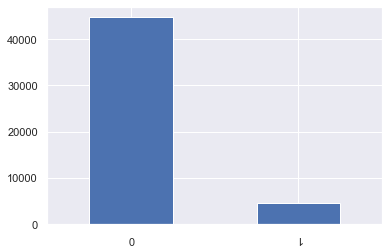

In [ ]:
f1_Y.value_counts().plot(kind='bar')
plt.title("Data Imbalance")
plt.xticks(rotation=180)
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(f1_X, f1_Y, test_size = 0.2, random_state=42)

In [ ]:
ss = StandardScaler()

ss.fit(X_train)
sstrain_x = ss.transform(X_train)
sstest_x = ss.transform(X_test)

In [ ]:
rfc = RandomForestClassifier(n_estimators = 200, max_depth = 2, random_state=42)

rfc.fit(sstrain_x, Y_train)

RandomForestClassifier(max_depth=2, n_estimators=200, random_state=42)

In [ ]:
pred1 = rfc.predict(sstest_x)

rf_accuracy = accuracy_score(Y_test, pred1)

print('Accuracy Score:{:.3f}'.format(rf_accuracy))
print(classification_report(Y_test, pred1))

Accuracy Score:0.911
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      8979
           1       1.00      0.04      0.07       910

    accuracy                           0.91      9889
   macro avg       0.96      0.52      0.51      9889
weighted avg       0.92      0.91      0.87      9889



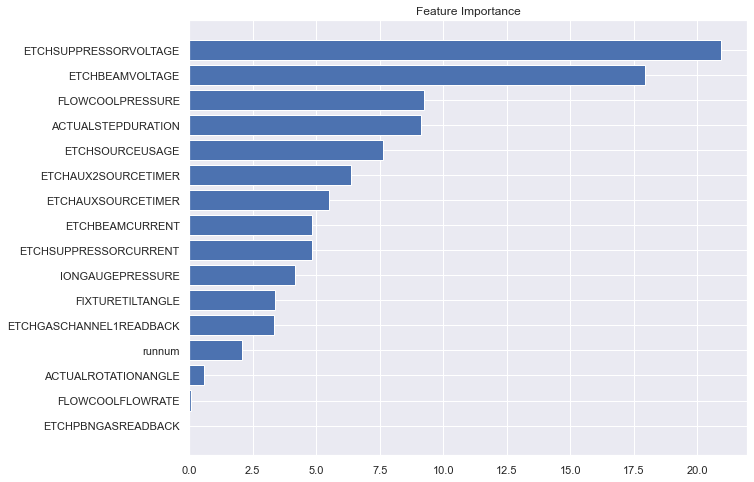

In [ ]:
imp1 = rfc.feature_importances_
imp1 =(imp1/np.sum(imp1))*100

sort_imp = np.argsort(imp1)
y_ticks = np.arange(0, len(f1_X.columns))
plt.figure(figsize=(10,8))
plt.barh(y_ticks, imp1[sort_imp])
#ax.set_yticklabels(f1_X.columns)
plt.yticks(y_ticks, f1_X.columns[sort_imp])
plt.title('Feature Importance')

plt.show()

In [ ]:
result = permutation_importance(rfc, sstest_x, Y_test, random_state =42)

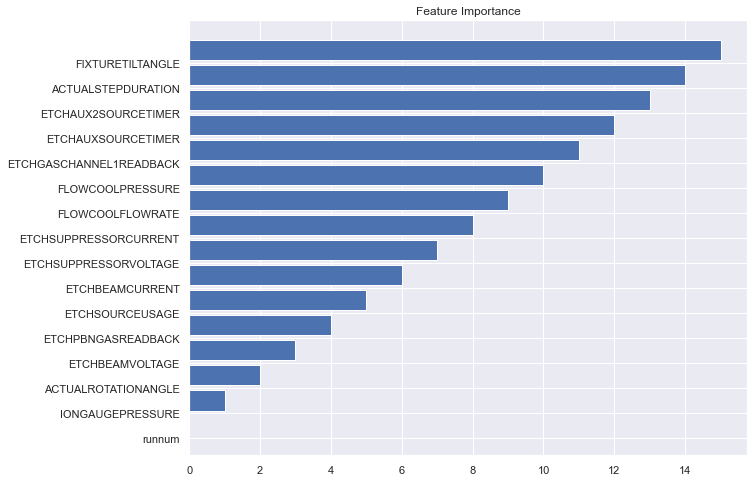

In [ ]:
pp = result.importances_mean.argsort()

sort_pp = np.argsort(pp)

pos=np.arange(sort_pp.shape[0])+0.5
#y_ticks = np.arange(0, len(f1_X.columns))
#fig, ax = plt.subplots(figsize=(10,6))
#ax.barh(y_ticks,pp)
#ax.set_yticklabels(f1_X.columns[sort_imp])
#ax.set_yticks(y_ticks)

plt.figure(figsize=(10,8))
plt.barh(pos, pp[sort_pp])
plt.yticks(y_ticks, f1_X.columns[sort_pp])
plt.title('Permutation Importance')
plt.show()

## PCA

In [ ]:
fault1_pca = PCA(n_components = 10)
fault1_pca.fit(sstrain_x)

PCA(n_components=10)

In [ ]:
#fault1_pca = transformer.transform(sscalef1)
f1_pca =fault1_pca.transform(sstrain_x)

In [ ]:
pd.DataFrame(np.cumsum(fault1_pca.explained_variance_ratio_))

,0
0,0.306874
1,0.516001
2,0.619717
3,0.686848
4,0.752230
5,0.815027
6,0.871218
7,0.924738
8,0.974217
9,0.992736


In [ ]:
fault1_pca.explained_variance_ratio_

array([0.30687415, 0.2091271 , 0.10371546, 0.06713179, 0.06538119,
       0.0627969 , 0.05619094, 0.05352093, 0.04947876, 0.01851833])

Text(0, 0.5, '% variance explained')

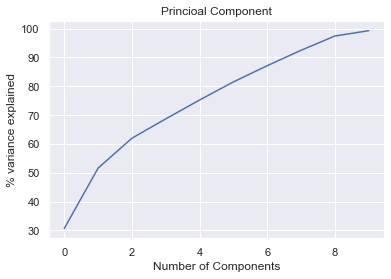

In [ ]:
plt.plot(np.cumsum(fault1_pca.explained_variance_ratio_)*100)
plt.title('Princioal Component')
plt.xlabel('Number of Components')
plt.ylabel('% variance explained')

In [ ]:
column = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10']
pcaf1 = pd.DataFrame(f1_pca, columns = column)

In [ ]:
pcaf1.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,0.533960,-1.013251,-1.667707,1.203443,-0.847783,-0.102869,1.126941,-0.406839,-0.545700,-0.251052
1,2.856903,-0.158508,0.808985,-0.592179,0.181995,-0.213702,-0.370118,0.548181,1.197591,-0.324017
2,1.475786,-1.386895,1.061862,-1.019606,0.862804,0.295955,-0.927098,-0.241011,-0.128251,0.635668
3,-2.277993,0.647033,0.283896,-0.397187,0.495168,-0.173542,0.049766,0.936399,0.859296,-0.165978
4,2.697929,-0.700799,-0.132043,-1.395299,0.979804,-0.028949,0.855065,1.651045,-0.756245,-0.613598


In [ ]:
pcaf1.shape

(39552, 10)

## PCA Test data

In [ ]:
test1_pca = PCA(n_components = 10)
test1_pca.fit(sstest_x)

PCA(n_components=10)

In [ ]:
#fault1_pca = transformer.transform(sscalef1)
pca_test =test1_pca.transform(sstest_x)

In [ ]:
pd.DataFrame(np.cumsum(test1_pca.explained_variance_ratio_))

,0
0,0.312752
1,0.527288
2,0.625822
3,0.696394
4,0.762514
5,0.818696
6,0.873060
7,0.924924
8,0.974411
9,0.992820


In [ ]:
test1_pca.explained_variance_ratio_

array([0.31275151, 0.21453695, 0.09853337, 0.07057211, 0.06612038,
       0.05618123, 0.05436454, 0.05186387, 0.04948698, 0.01840925])

Text(0, 0.5, '% variance explained')

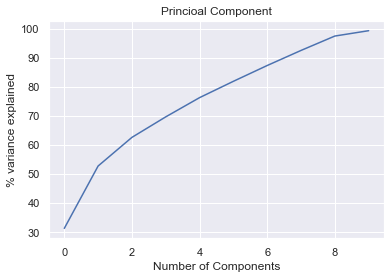

In [ ]:
plt.plot(np.cumsum(test1_pca.explained_variance_ratio_)*100)
plt.title('Princioal Component')
plt.xlabel('Number of Components')
plt.ylabel('% variance explained')

In [ ]:
column = ['pca1','pca2','pca3','pca4','pca5','pca6','pca7','pca8','pca9','pca10']
test_pca = pd.DataFrame(pca_test, columns = column)

In [ ]:
test_pca.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10
0,-2.002938,0.660214,0.572824,-0.080330,-0.224548,0.156279,0.661332,0.326717,-0.127628,-0.495416
1,-1.601232,4.350652,0.052390,0.035962,0.381022,-0.771111,-0.670160,-0.482342,0.070290,0.164914
2,0.515772,-1.069029,-1.736415,0.345783,-1.399349,1.039043,-0.296509,-0.560713,0.470837,0.243442
3,0.497434,-1.092947,-1.706238,0.347889,-1.404738,1.022172,-0.299596,-0.519477,0.527888,0.206269
4,-1.554540,0.523270,1.305730,-0.056471,-0.745707,0.331592,1.323600,-0.703148,-0.121908,0.463177


In [ ]:
test_pca.shape

(9889, 10)

### Random Forest Classifier with PCA

In [ ]:
rfc_pca = RandomForestClassifier(n_estimators = 200, max_depth = 2, random_state=42)

rfc_pca.fit(pcaf1, Y_train)

RandomForestClassifier(max_depth=2, n_estimators=200, random_state=42)

In [ ]:
pred_pca = rfc_pca.predict(test_pca)

rf_accuracy = accuracy_score(Y_test, pred_pca)

print('Accuracy Score:{:.3f}'.format(rf_accuracy))
print(classification_report(Y_test, pred_pca))

Accuracy Score:0.908
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      8979
           1       0.00      0.00      0.00       910

    accuracy                           0.91      9889
   macro avg       0.45      0.50      0.48      9889
weighted avg       0.82      0.91      0.86      9889



### SMOTEEN

In [ ]:
smote = SMOTEENN(random_state=2)

X_res, Y_res = smote.fit_resample(sstrain_x, Y_train.ravel())

In [ ]:
X_res_pca, Y_res_pca = smote.fit_resample(pcaf1, Y_train.ravel())

### Random Forest Classifier with SMOTEEN

In [ ]:
smote_rfc = RandomForestClassifier(n_estimators = 200, max_depth = 2, random_state=42)

smote_rfc.fit(X_res, Y_res)

RandomForestClassifier(max_depth=2, n_estimators=200, random_state=42)

In [ ]:
smotepred1 = smote_rfc.predict(sstest_x)

smote_rf_accuracy = accuracy_score(Y_test, smotepred1)

print('Accuracy Score:{:.3f}'.format(smote_rf_accuracy))
print(classification_report(Y_test, smotepred1))

Accuracy Score:0.751
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      8979
           1       0.22      0.69      0.34       910

    accuracy                           0.75      9889
   macro avg       0.59      0.73      0.59      9889
weighted avg       0.89      0.75      0.80      9889



In [ ]:
smote_cm_rfc = confusion_matrix(Y_test, smotepred1)

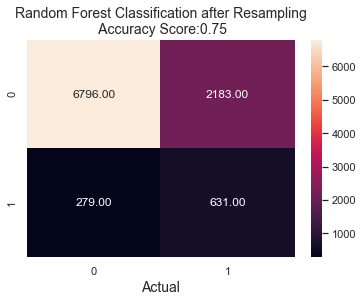

In [ ]:
sns.heatmap(smote_cm_rfc, annot=True, fmt='.2f')
plt.title('Random Forest Classification after Resampling\n Accuracy Score:{:.2f}'.format(smote_rf_accuracy), fontsize=14)
plt.xlabel(('Predicted'), fontsize =14)
plt.xlabel(('Actual'), fontsize =14)
plt.show()

### Random Forest Classifier with PCA and SMOTEEN

In [ ]:
smote_pca = RandomForestClassifier(n_estimators = 200, max_depth = 2, random_state=42)

smote_pca.fit(X_res_pca, Y_res_pca)

RandomForestClassifier(max_depth=2, n_estimators=200, random_state=42)

In [ ]:
smote_pred_pca = smote_pca.predict(test_pca)

pca_accuracy = accuracy_score(Y_test, smote_pred_pca)

print('Accuracy Score:{:.3f}'.format(pca_accuracy))
print(classification_report(Y_test, smote_pred_pca))

Accuracy Score:0.780
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      8979
           1       0.23      0.61      0.34       910

    accuracy                           0.78      9889
   macro avg       0.59      0.70      0.60      9889
weighted avg       0.89      0.78      0.82      9889



In [ ]:
smote_cm_pca = confusion_matrix(Y_test, smote_pred_pca)

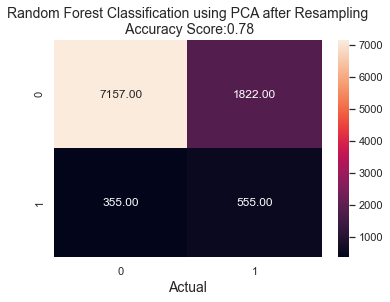

In [ ]:
sns.heatmap(smote_cm_pca, annot=True, fmt='.2f')
plt.title('Random Forest Classification using PCA after Resampling\n Accuracy Score:{:.2f}'.format(pca_accuracy), fontsize=14)
plt.xlabel(('Predicted'), fontsize =14)
plt.xlabel(('Actual'), fontsize =14)
plt.show()